In [1]:
from Adaptive_GP.GP import GP


import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})

import torch as th
import os
import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
smoke_test = ('CI' in os.environ)
pyro.set_rng_seed(0)

from datetime import datetime

import matplotlib as mpl
from matplotlib import rc
mpl.rcParams['font.family'] = ['times new roman'] # default is sans-serif
rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
datetime = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
%load_ext autoreload
%autoreload 2

## Surrogating with GP without adaptive step

In [12]:
# Function for which surrogate is needed
def f(x):
    y = (6 * x - 2)**2 * np.sin(12 * x - 4)
    return y.flatten()

In [13]:
# Initialisation
metamodel = GP(input_dim=1,function=f)

In [36]:
# Training
x_train = np.reshape(np.linspace(0,1,100) ,(-1,1))
loss = metamodel.fit(x_train)

In [37]:
# Prediction
x_pred = np.reshape(np.linspace(0,1,200) ,(-1,1))
mean, cov = metamodel.predict(x_pred)

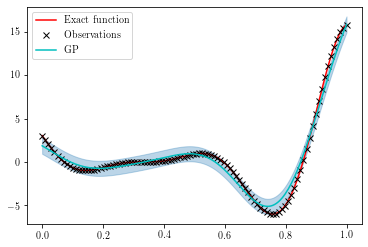

In [39]:
metamodel.predict_plot(mean,cov,x_pred,x_pred)

## Adaptive GP